In [1]:
from opt_util_solution import *
import matplotlib.pyplot as plt
import random
import torch
import numpy as np

# Implement GD for an (approximate) RKHS model

In [2]:
# generate some data
sgd = 1
n_x = 100  # num samples
dim_x = 1

data = np.random.uniform(-1, 1, size=[n_x, dim_x+1])
X = 2 * np.pi * torch.from_numpy(data[:, 0]).float()
Y = (torch.sin(X) + 0.4 * torch.rand_like(X, requires_grad=False)).reshape(-1, 1)

In [3]:
## define the model
f_rf_1 = ml_model(model_class = 'rf', dim_x=dim_x, loss = torch.nn.MSELoss())
optim_1 = torch.optim.SGD(f_rf_1.parameters, lr=0.1)

iteration of GD: 0


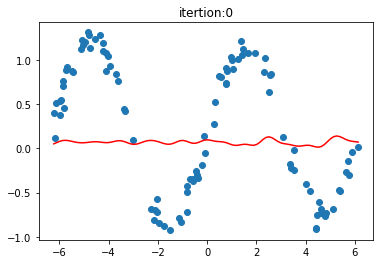

iteration of GD: 100


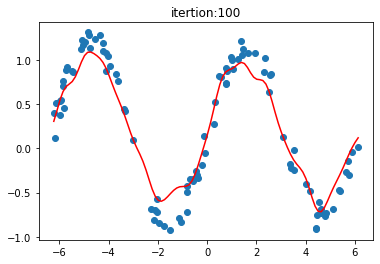

iteration of GD: 200


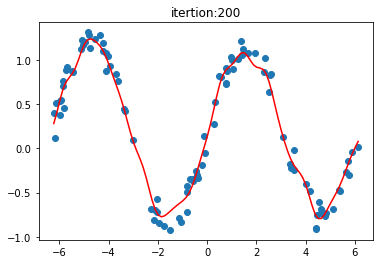

iteration of GD: 300


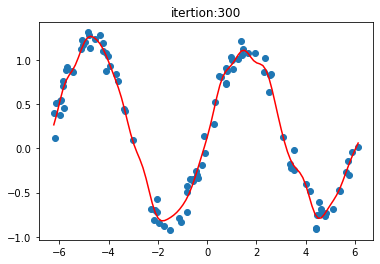

iteration of GD: 400


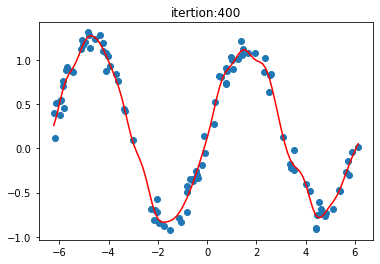

iteration of GD: 500


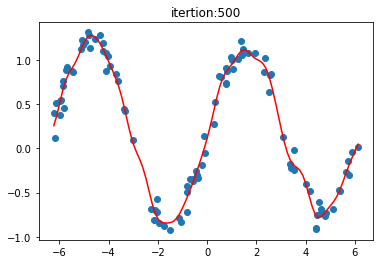

iteration of GD: 600


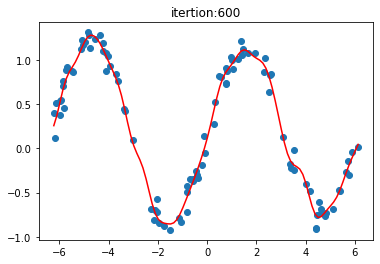

iteration of GD: 700


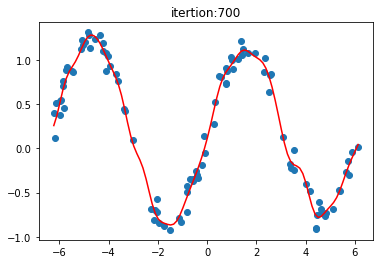

iteration of GD: 800


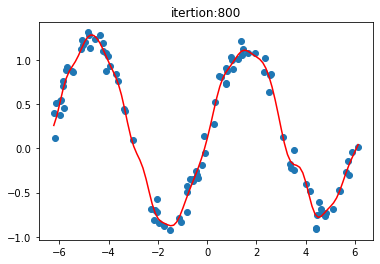

iteration of GD: 900


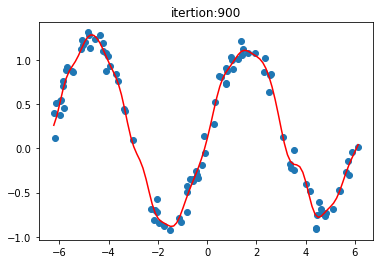

In [4]:
## carry out GD steps
for iter_gd in range(1000):
    # opt step
    f_rf_1.train_step(x_th=X, y_th=Y, optimization=optim_1)

    # for plotting
    if iter_gd % 100 == 0:
        print('iteration of GD:', iter_gd)
        plt.figure()
        plot_fitting(f_rf_1, X)
        plt.scatter(x=X, y=Y)
        plt.title("itertion:" + str(iter_gd))
        plt.show()

# Implement SGD for the same model

In [5]:
## define the model
f_rf_sgd = ml_model(model_class = 'rf', dim_x=dim_x, loss = torch.nn.MSELoss())
optim_sgd = torch.optim.SGD(f_rf_sgd.parameters, lr=0.1)

iteration of GD: 0


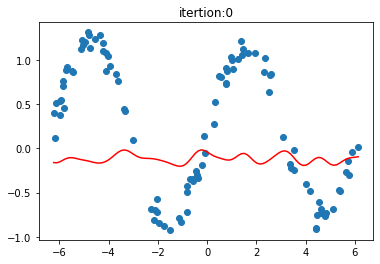

iteration of GD: 100


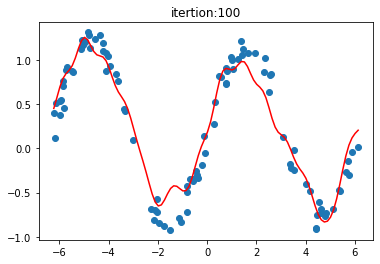

iteration of GD: 200


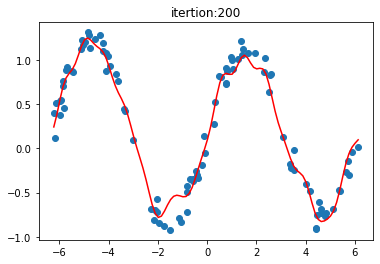

iteration of GD: 300


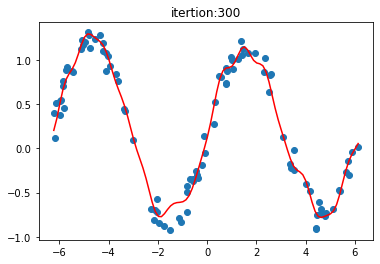

iteration of GD: 400


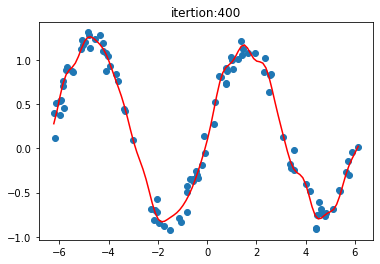

iteration of GD: 500


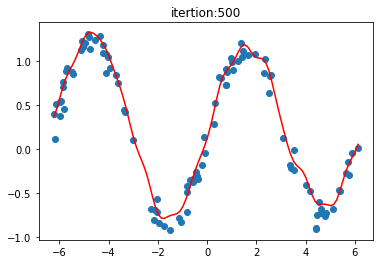

iteration of GD: 600


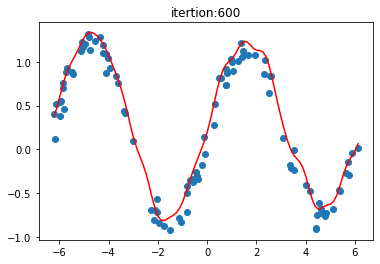

iteration of GD: 700


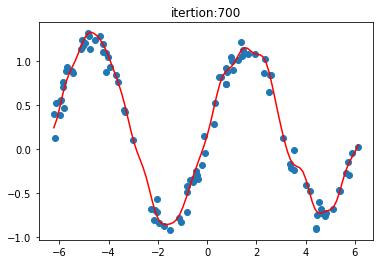

iteration of GD: 800


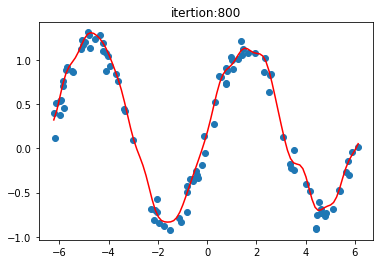

iteration of GD: 900


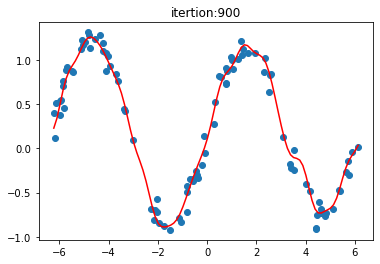

In [6]:
## carry out SGD steps
for iter_gd in range(1000):
    # opt step
    id_rnd = random.randint(0, n_x - 1)
    f_rf_sgd.train_step(x_th=X[id_rnd], y_th=Y[id_rnd].reshape(-1,1), optimization=optim_sgd)

    # for plotting
    if iter_gd % 100 == 0:
        print('iteration of GD:', iter_gd)
        plt.figure()
        plot_fitting(f_rf_sgd, X)
        plt.scatter(x=X, y=Y)
        plt.title("itertion:" + str(iter_gd))
        plt.show()

# Implement an NN model

In [7]:
## define the model
f_nn = ml_model(model_class = 'nn', dim_x=dim_x, loss = torch.nn.MSELoss())
optim_nn = torch.optim.SGD(f_nn.parameters, lr=0.005)

iteration of GD: 0


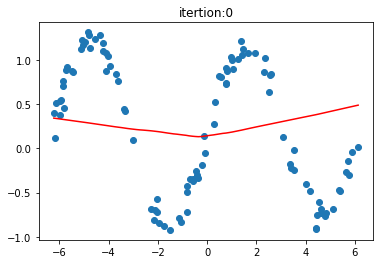

iteration of GD: 100


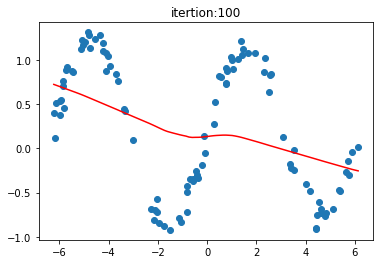

iteration of GD: 200


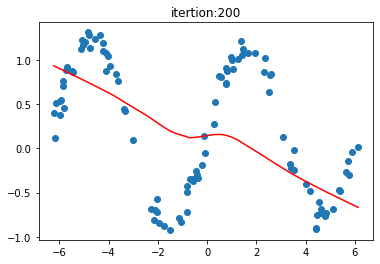

iteration of GD: 300


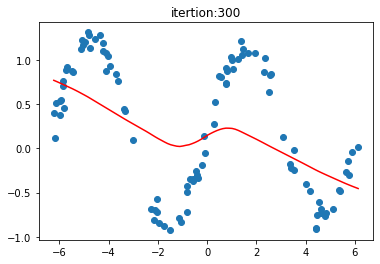

iteration of GD: 400


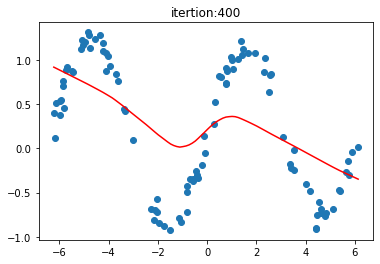

iteration of GD: 500


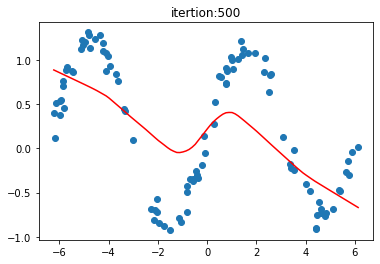

iteration of GD: 600


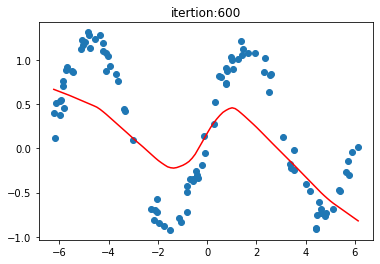

iteration of GD: 700


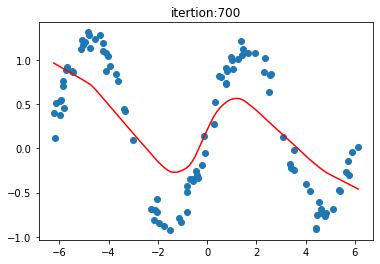

iteration of GD: 800


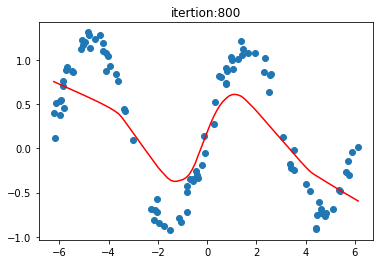

iteration of GD: 900


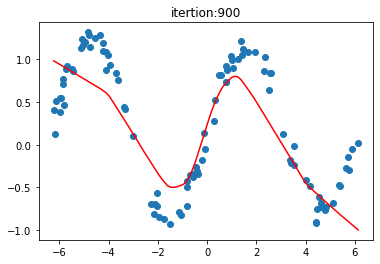

iteration of GD: 1000


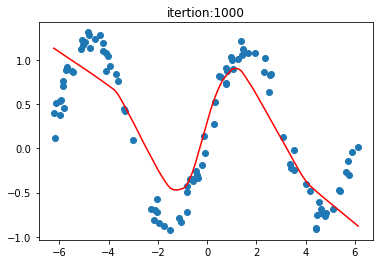

iteration of GD: 1100


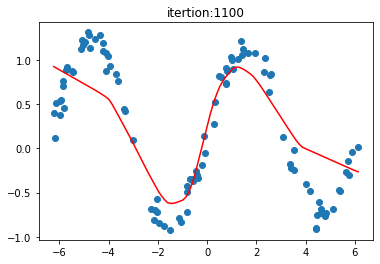

iteration of GD: 1200


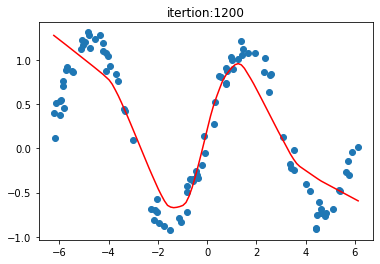

iteration of GD: 1300


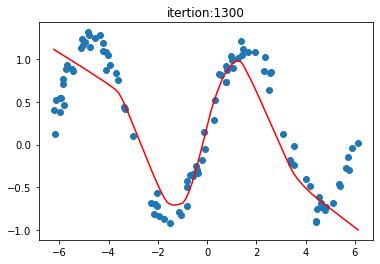

iteration of GD: 1400


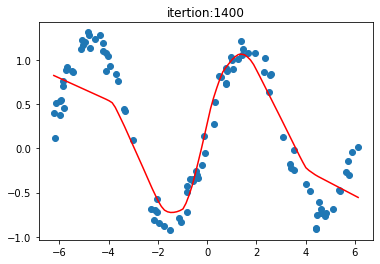

iteration of GD: 1500


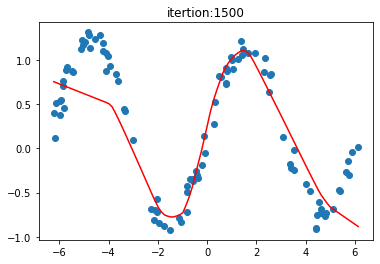

iteration of GD: 1600


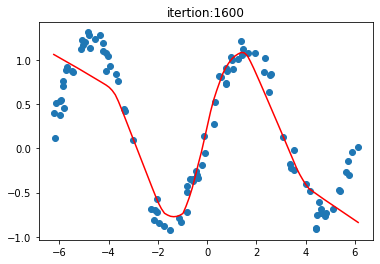

iteration of GD: 1700


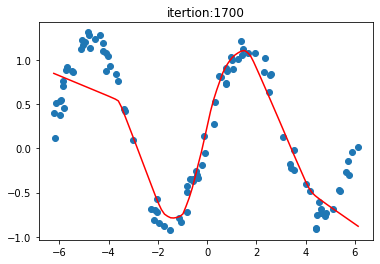

iteration of GD: 1800


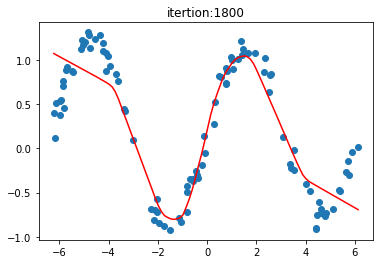

iteration of GD: 1900


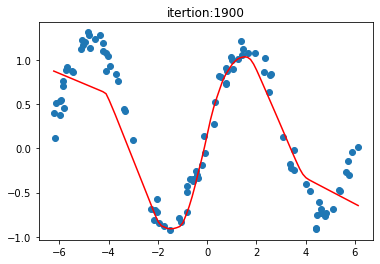

iteration of GD: 2000


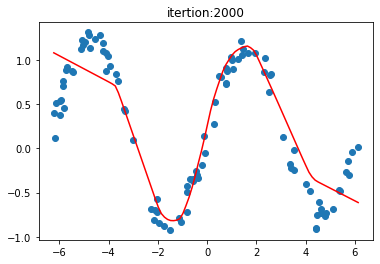

iteration of GD: 2100


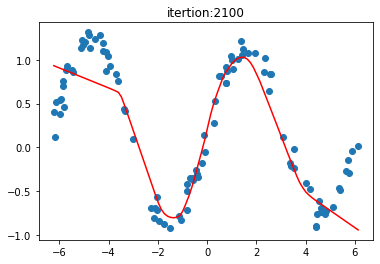

iteration of GD: 2200


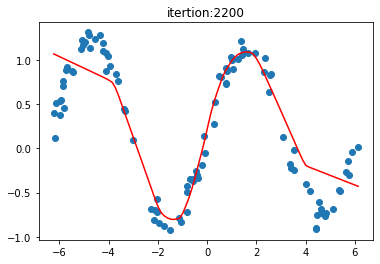

iteration of GD: 2300


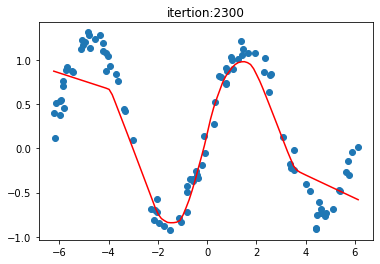

iteration of GD: 2400


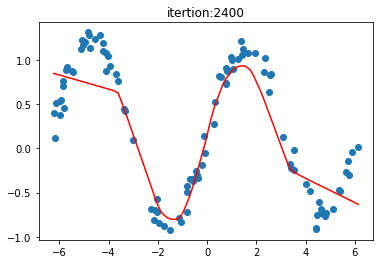

iteration of GD: 2500


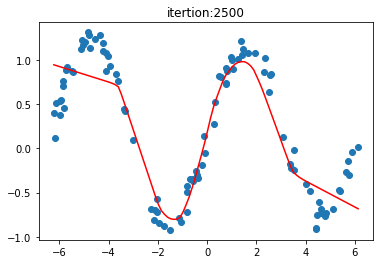

iteration of GD: 2600


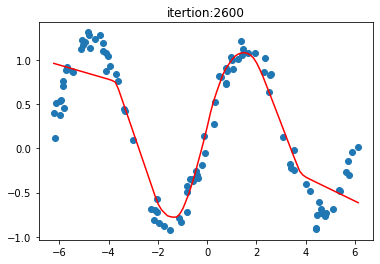

iteration of GD: 2700


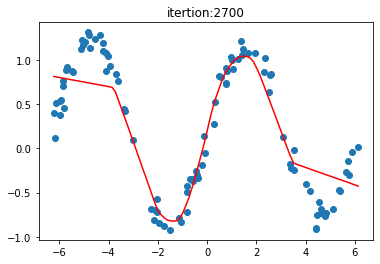

iteration of GD: 2800


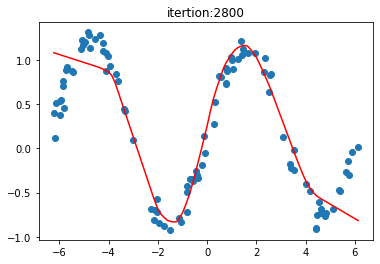

iteration of GD: 2900


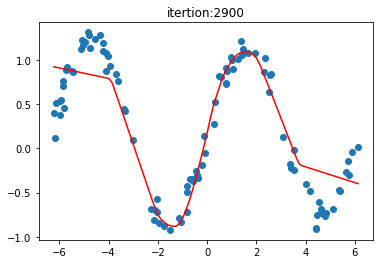

iteration of GD: 3000


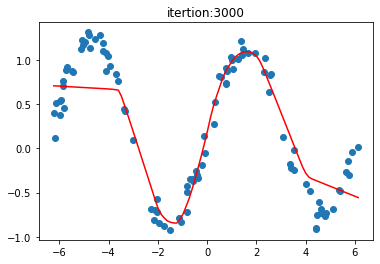

iteration of GD: 3100


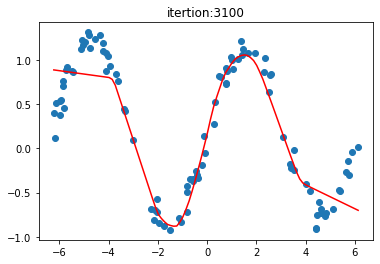

iteration of GD: 3200


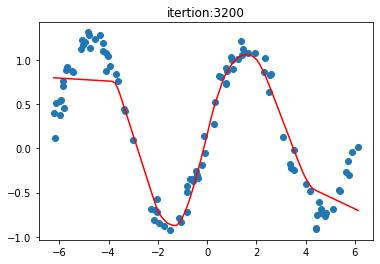

iteration of GD: 3300


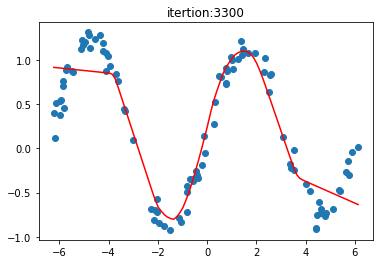

iteration of GD: 3400


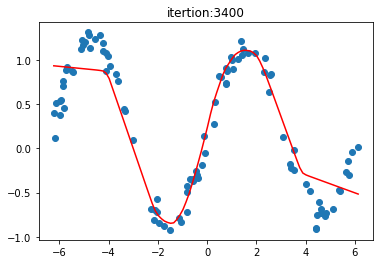

iteration of GD: 3500


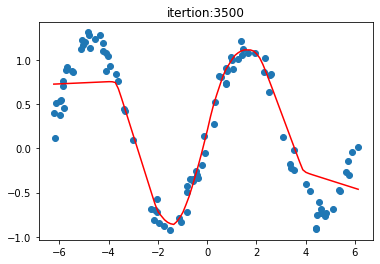

iteration of GD: 3600


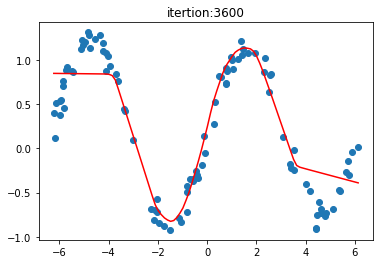

iteration of GD: 3700


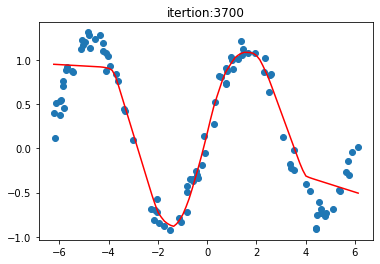

iteration of GD: 3800


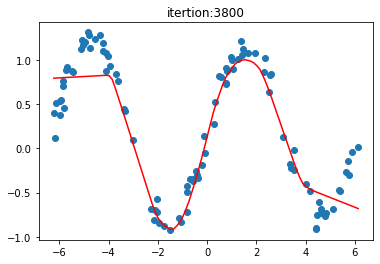

iteration of GD: 3900


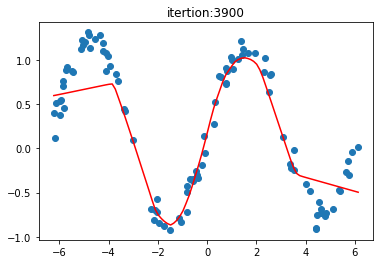

iteration of GD: 4000


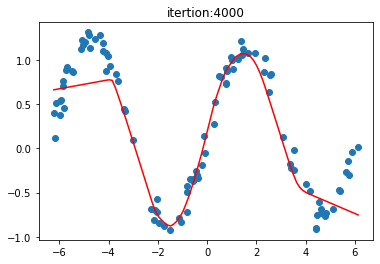

iteration of GD: 4100


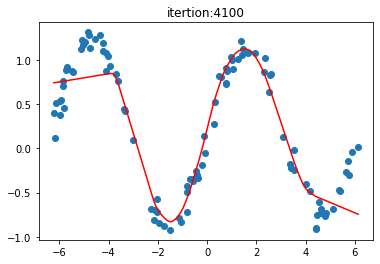

iteration of GD: 4200


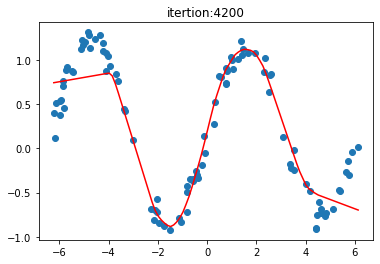

iteration of GD: 4300


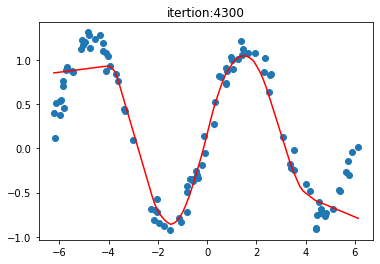

iteration of GD: 4400


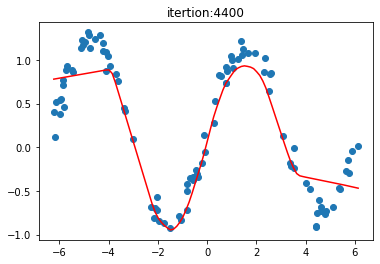

iteration of GD: 4500


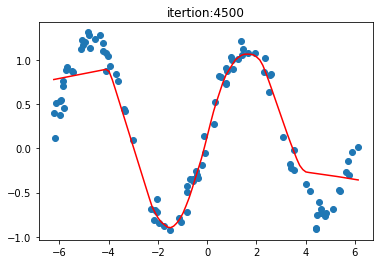

iteration of GD: 4600


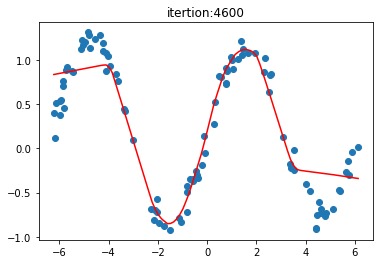

iteration of GD: 4700


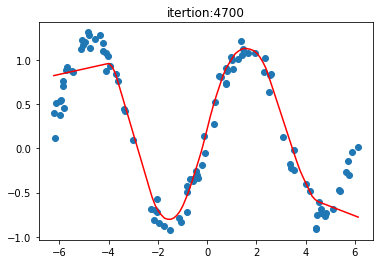

iteration of GD: 4800


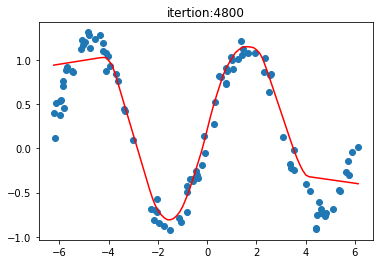

iteration of GD: 4900


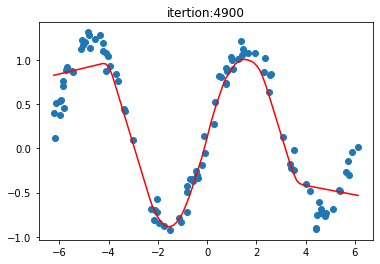

iteration of GD: 5000


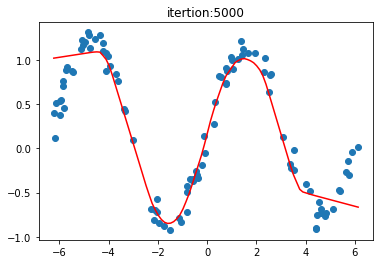

iteration of GD: 5100


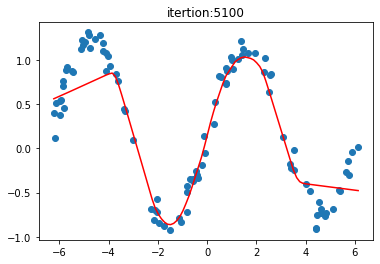

iteration of GD: 5200


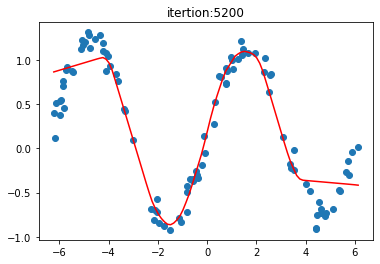

iteration of GD: 5300


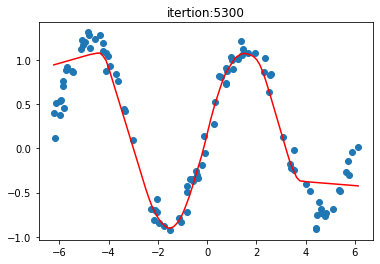

iteration of GD: 5400


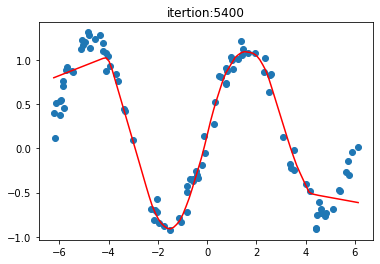

iteration of GD: 5500


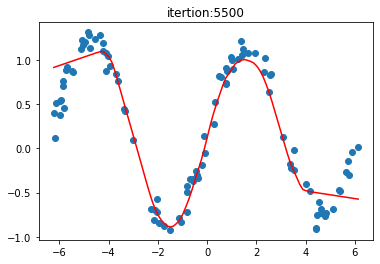

iteration of GD: 5600


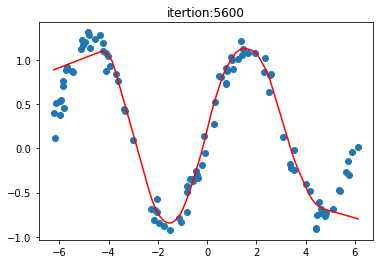

iteration of GD: 5700


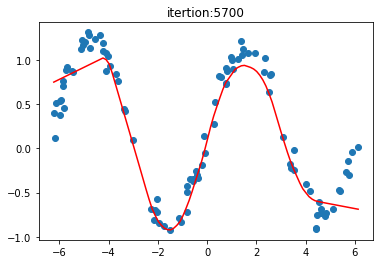

iteration of GD: 5800


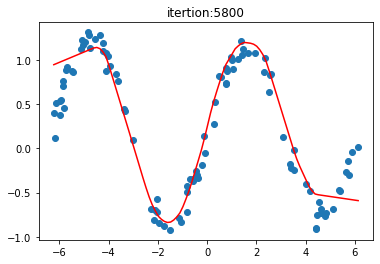

iteration of GD: 5900


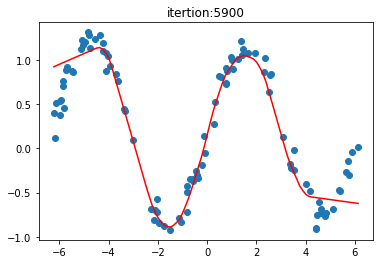

iteration of GD: 6000


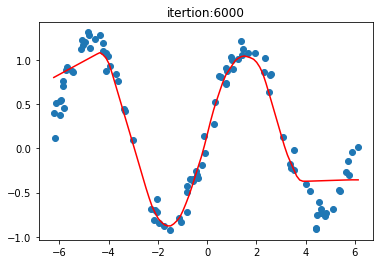

iteration of GD: 6100


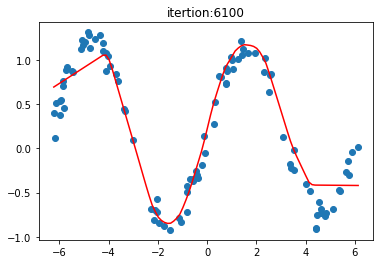

iteration of GD: 6200


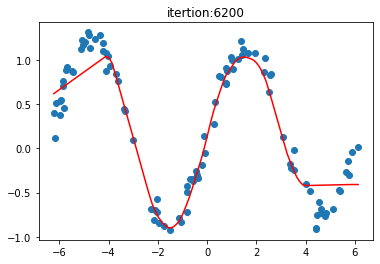

iteration of GD: 6300


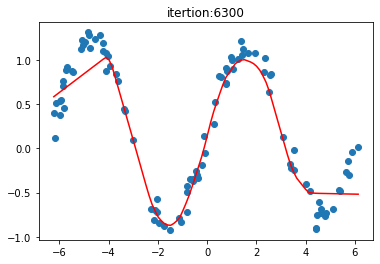

iteration of GD: 6400


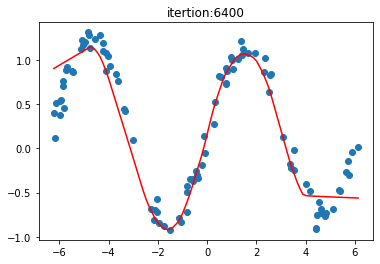

iteration of GD: 6500


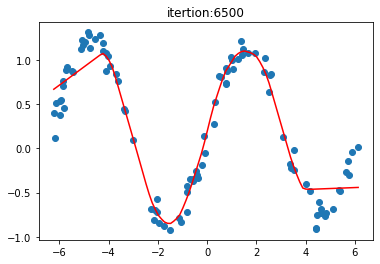

iteration of GD: 6600


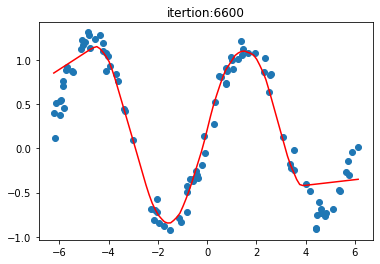

iteration of GD: 6700


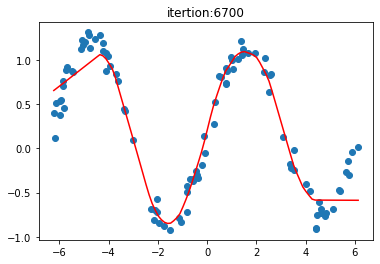

iteration of GD: 6800


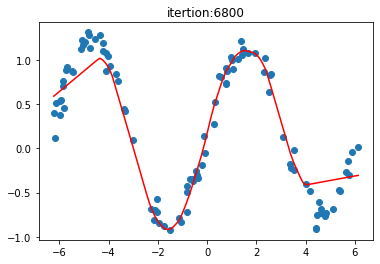

iteration of GD: 6900


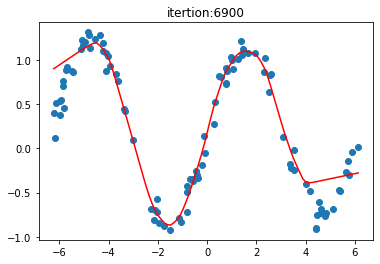

iteration of GD: 7000


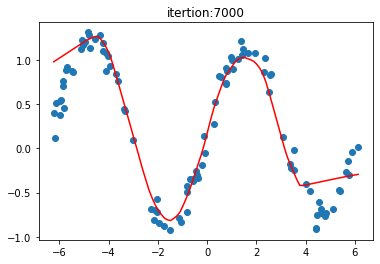

iteration of GD: 7100


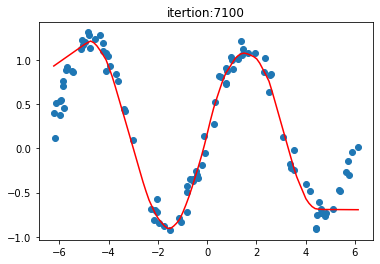

iteration of GD: 7200


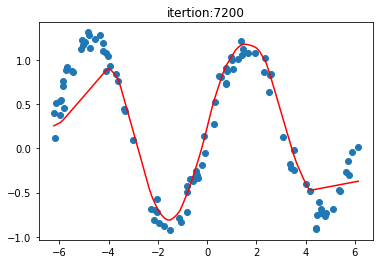

iteration of GD: 7300


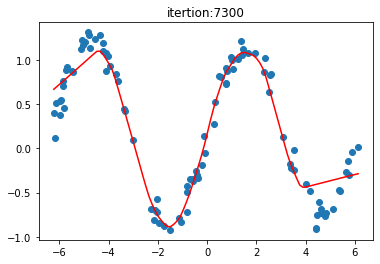

iteration of GD: 7400


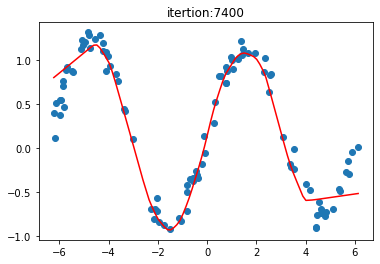

iteration of GD: 7500


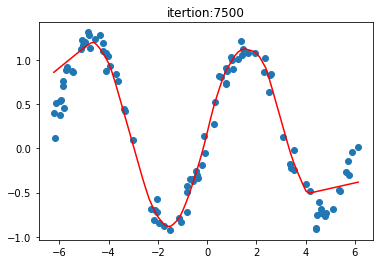

iteration of GD: 7600


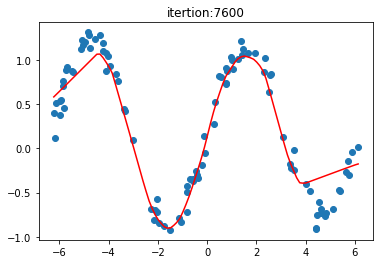

iteration of GD: 7700


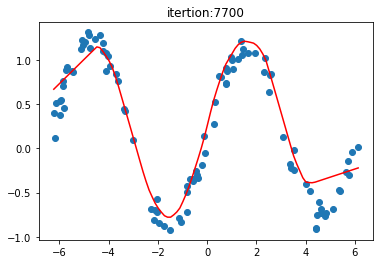

iteration of GD: 7800


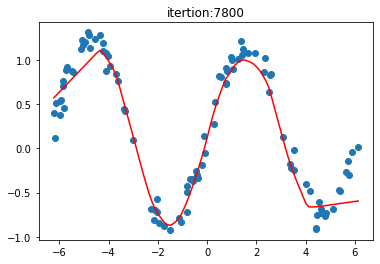

iteration of GD: 7900


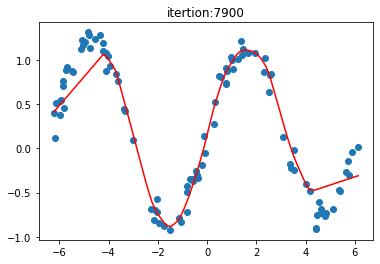

iteration of GD: 8000


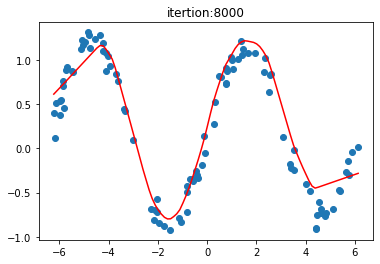

iteration of GD: 8100


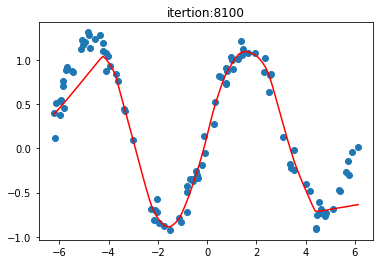

iteration of GD: 8200


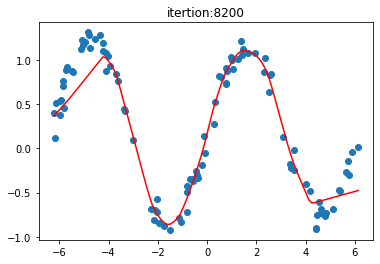

iteration of GD: 8300


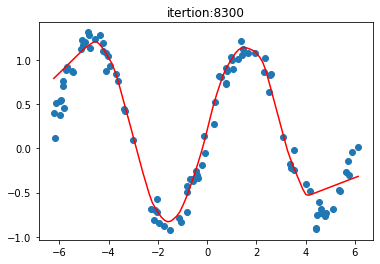

iteration of GD: 8400


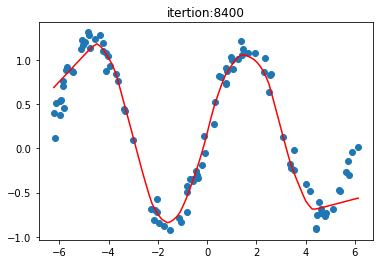

iteration of GD: 8500


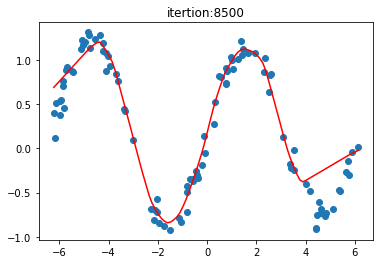

iteration of GD: 8600


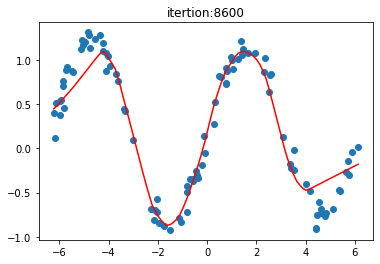

iteration of GD: 8700


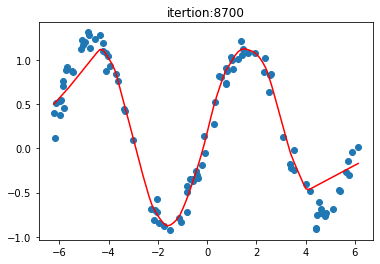

iteration of GD: 8800


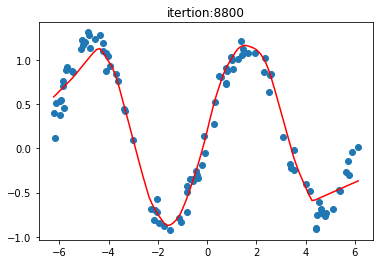

iteration of GD: 8900


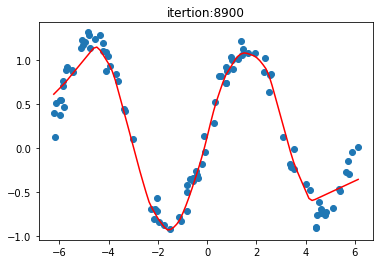

iteration of GD: 9000


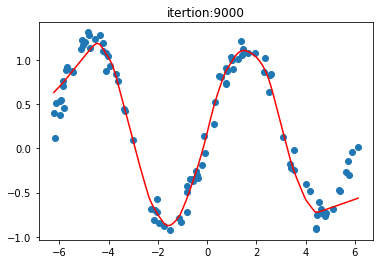

iteration of GD: 9100


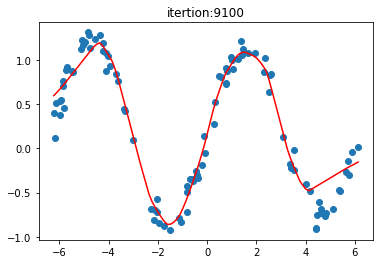

iteration of GD: 9200


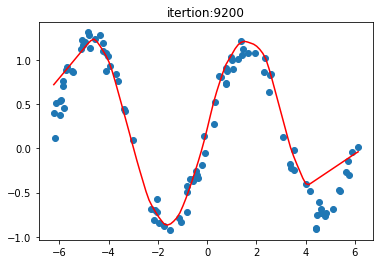

iteration of GD: 9300


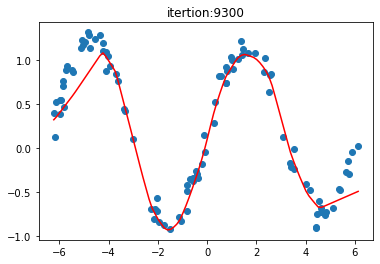

iteration of GD: 9400


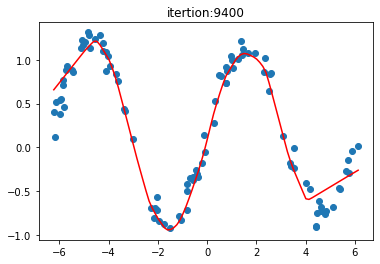

iteration of GD: 9500


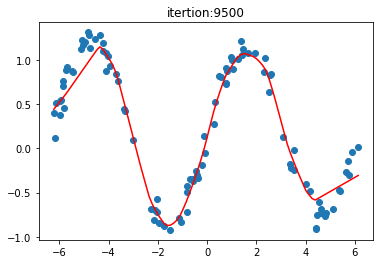

iteration of GD: 9600


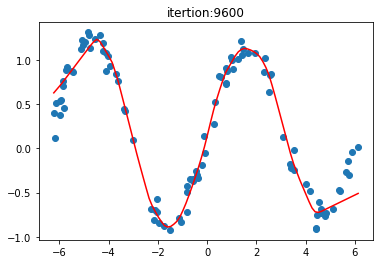

iteration of GD: 9700


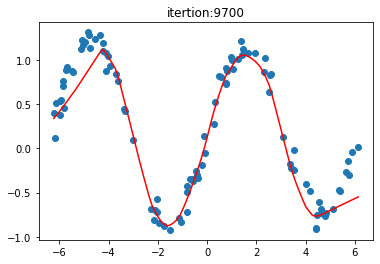

iteration of GD: 9800


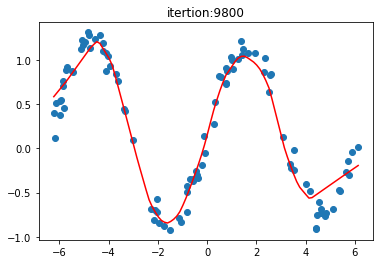

iteration of GD: 9900


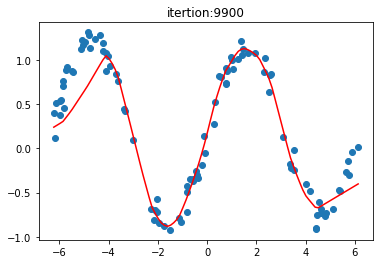

In [8]:
## carry out SGD steps
for iter_gd in range(10000):
    # opt step
    id_rnd = random.randint(0, n_x - 1)
    f_nn.train_step(x_th=X[id_rnd], y_th=Y[id_rnd].reshape(-1,1), optimization=optim_nn)

    # for plotting
    if iter_gd % 100 == 0:
        print('iteration of GD:', iter_gd)
        plt.figure()
        plot_fitting(f_nn, X)
        plt.scatter(x=X, y=Y)
        plt.title("itertion:" + str(iter_gd))
        plt.show()

## Questions
- [ ] Is there any benefits that SGD offers over GD?
- [ ] Any downsides?
- [ ] RKHS or NN? Why? Can RKHS (shallow) model behave badly?

# Bonus
- Implement weight averaging: https://pytorch.org/docs/stable/optim.html#stochastic-weight-averaging
- Play with the step size (learning rate). What are the best (better) values?
- Can you load another dataset? 
